In [47]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [48]:
!git clone https://github.com/Hima0507/project.git

fatal: destination path 'project' already exists and is not an empty directory.


In [49]:
df= pd.read_csv("/content/project/Water Quality/water_potability.csv")

In [50]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [52]:
df['Potability']=df['Potability'].astype('category')

In [53]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [54]:
# Statistical Analysys

df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [55]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [56]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [57]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [58]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [59]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [60]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

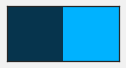

In [61]:
#EDA

#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

TypeError: ignored

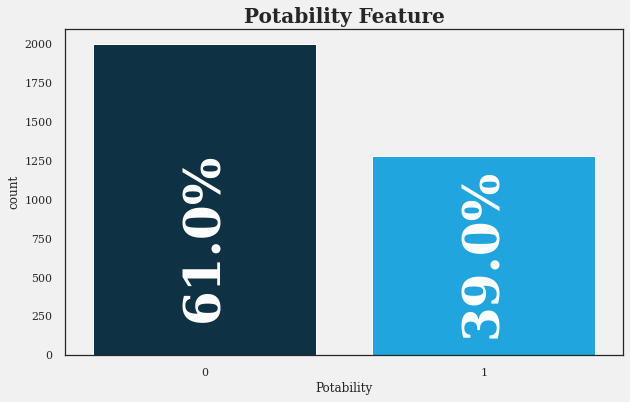

In [64]:
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", colors='black', connectionstyle="angle3,angleA=0,angleB=90"), colors='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", colors='black',  connectionstyle="angle3,angleA=0,angleB=90"), colors='black')

In [66]:
# Distribution Plots

limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


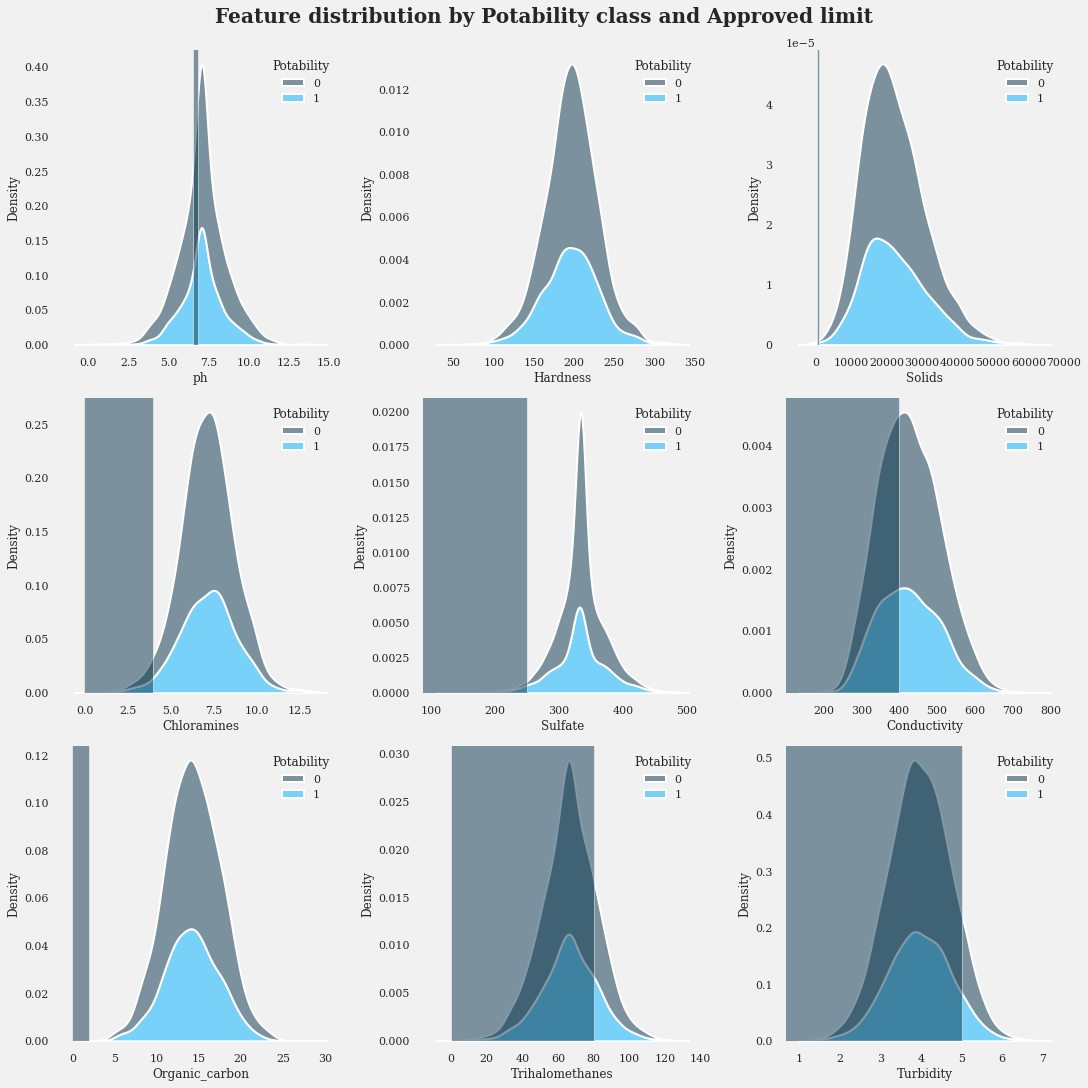

In [65]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

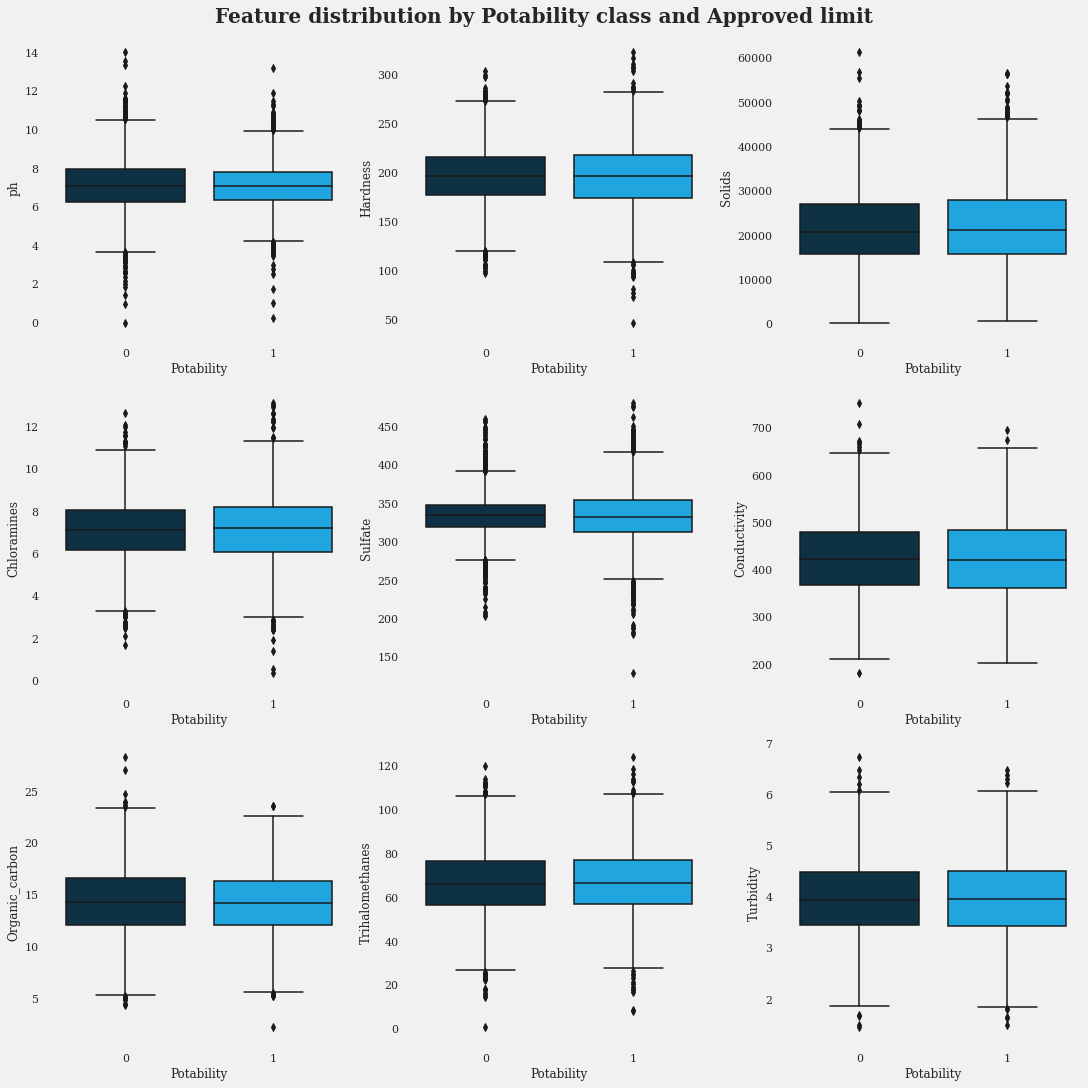

In [67]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

p_value for ph is 0.8257362194511897 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is 0.12292453703922816 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973679 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620837931 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

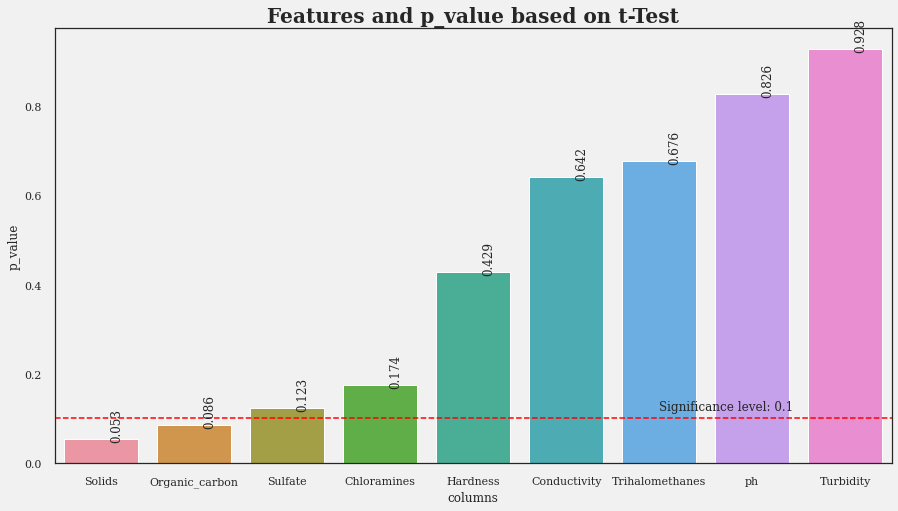

In [68]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

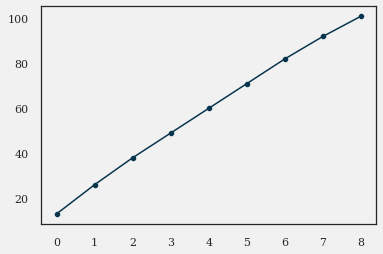

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') #let try with auto rather than defining the components
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

In [70]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [71]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,"ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')",0.589708
5,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')",0.651884
0,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=None)",0.693545
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')",0.722778
1,"BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.753692
2,"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)",0.755373


              precision    recall  f1-score   support

           0       0.86      0.76      0.81       510
           1       0.66      0.80      0.72       309

    accuracy                           0.77       819
   macro avg       0.76      0.78      0.76       819
weighted avg       0.79      0.77      0.77       819



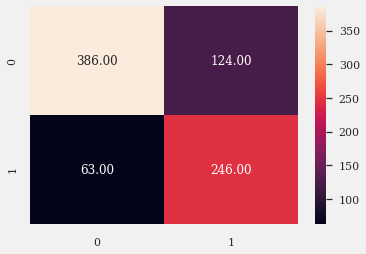

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       510
           1       0.68      0.73      0.70       309

    accuracy                           0.77       819
   macro avg       0.75      0.76      0.76       819
weighted avg       0.77      0.77      0.77       819



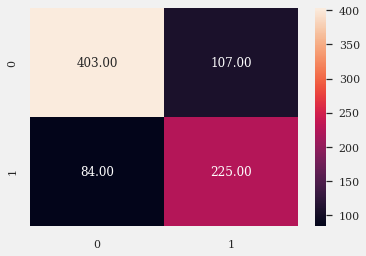

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=80)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [75]:
model.predict_proba(X_test)

array([[0.7875, 0.2125],
       [0.85  , 0.15  ],
       [0.6875, 0.3125],
       ...,
       [0.025 , 0.975 ],
       [0.7625, 0.2375],
       [0.5875, 0.4125]])